# Case :- Use titanic dataset to build a model that predict whether a passenger on the titanic survived or not

TITANIC SURVIVAL PREDICTION

• Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner project with readily available data.

• The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived

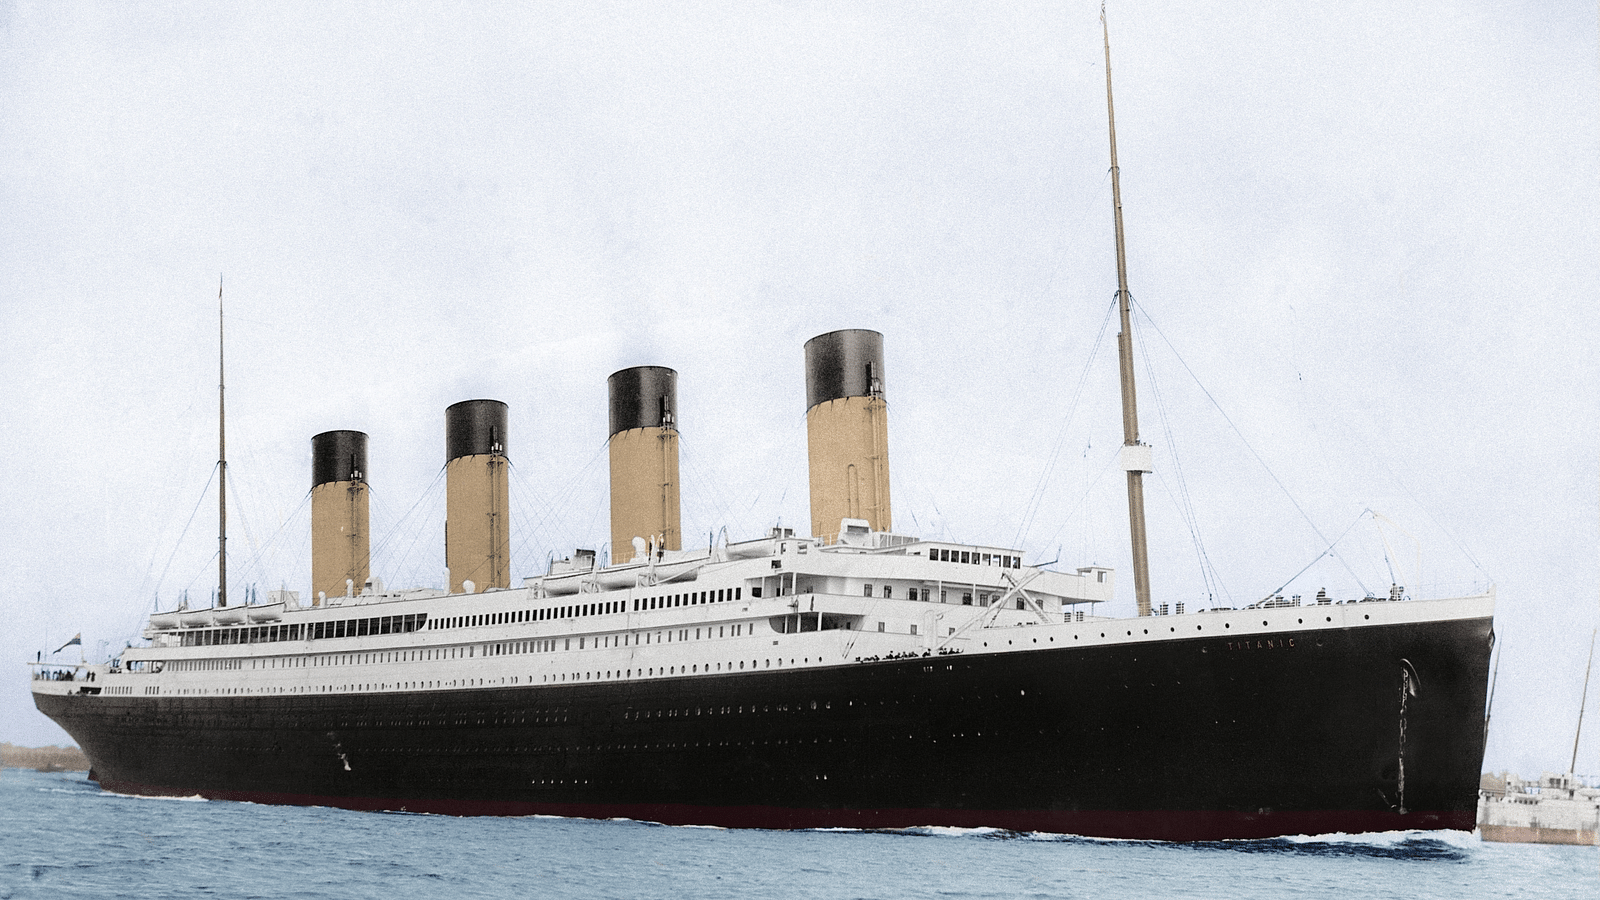


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('tested.csv')

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Domain Analysis

#### PassengerId :- Unquie id given to every paseenger present on the titanic ship.
    
#### Survived :-  If they survived or not.(contains your binary predictions: 1 for survived, 0 for deceased) 

#### Pclass :-  The class passengers travelled in. 1 = First class 2 = Second class 3 = Third class

#### Name :- Name of passenger

#### Sex :- Gender of Passenger.

#### Age :- Age of passenger.

#### SibSp :- Number of siblings.

#### Parch :-  Number of Parents/Children Aboard.

#### Ticket :-Ticket number of all the passenger.

#### Fare :- Ticket fare of the passenger.

#### Cabin :- A cabin or berthing is an enclosed space generally on a ship or an aircraft.

#### Embarked :- C = Cherbourg Q = Queenstown S = Southampton. Go on board a ship


## Basic Checks

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


#### 1)There are no constant value present in the dataset.
#### 2)The oldest passenger on the ship is 76 years old.
#### 3)Age and Fare column has null values.
#### 4)Maximum passenger are travelling in class 3 and minmum in class 1

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


#### Data consists of datatype float with 2 attribute, integer with 5 and object with 5 attribute.

In [8]:
data.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


#### There are more number of male passenger than female passenger on the ship.
#### The Cabin column consist of missing value.
#### There are 3 unique values in Embarked.
#### Most of the passenger on the ship started their journey from S = Southampton

In [9]:
data.shape

(418, 12)

#### data consists of 418 rows and 12 columns.

In [10]:
data.size

5016

## Exploratory Data Analysis

### Univariate analysis


In [11]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


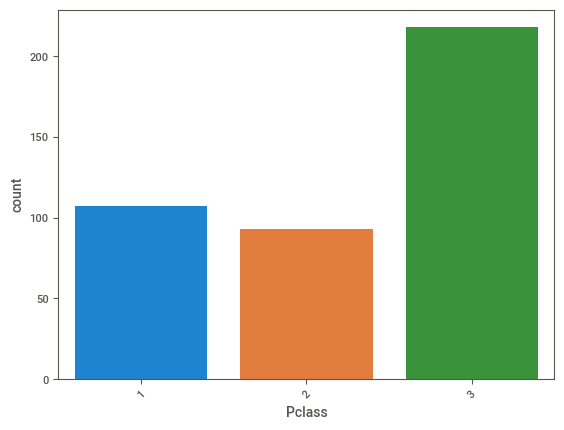

In [12]:
#univariate analysis of Pclass 
sns.countplot(x='Pclass', data=data)
plt.xticks(rotation=45)
plt.show()

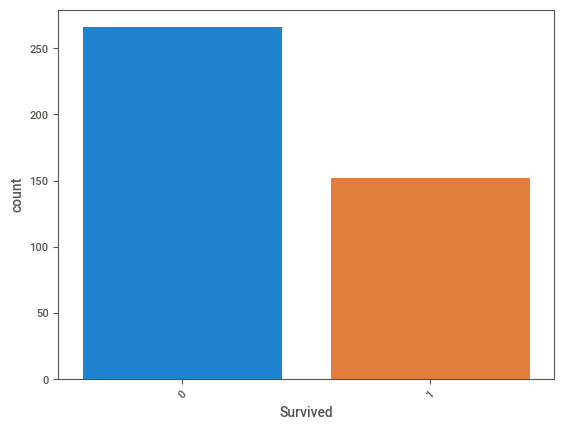

In [13]:
#univariate analysis of Survived
sns.countplot(x='Survived', data=data)
plt.xticks(rotation=45)
plt.show()

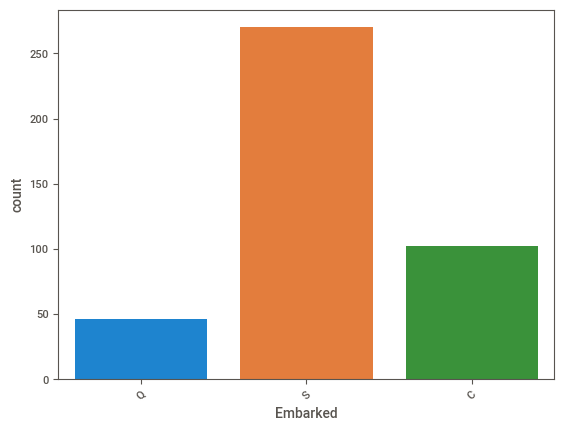

In [14]:
#univariate analysis of Embarked 
sns.countplot(x='Embarked', data=data)
plt.xticks(rotation=45)
plt.show()

##### Insights from the data

#### Passenger Id is just unquie id given to all the passenger on the ship.

#### Pclass has 3 distict values with no missing values. 52% of the passenger are from class 3, 26% in class 1 and 22% in class 2. Class 2 has least number of people.

#### Name of all the passenger on boarded on the ship.

#### There are 64% of males present on the ship whereas the number of female is 152 that is 36%.

#### In age column 21% of the data is missing. Moat fo the passenger age ranges between 20 to 40. The distribution is positively skewed with 0.084 of kurtosis.

#### 68% of the passenger onborded alone on the ship without any sibling.

#### 78% of the passemger has 0 parch no parents no childerns.

#### Ticket is the unquie ticket number of all the passenger.

#### Embarked has 3 distinct values with no missing values. Where 65% of the passenger got on board on the ship from S(Southampton), 24% fron c(Cherbourg), and 11% from Q(Queenstown).

#### survived is the output which contains binary predictions: 1 for survived, 0 for deceased, where 64% of the passenger were dead and 36% of the passenger survived that accident. 

###  Bivariate analysis

In [15]:
#Analayzing catogorical data
d1=data[['Name','Sex','Embarked']]
#Analayzing Numerical data
d2=data[['PassengerId','Survived','Pclass','Age','SibSp','Parch','Ticket','Fare','Cabin']]


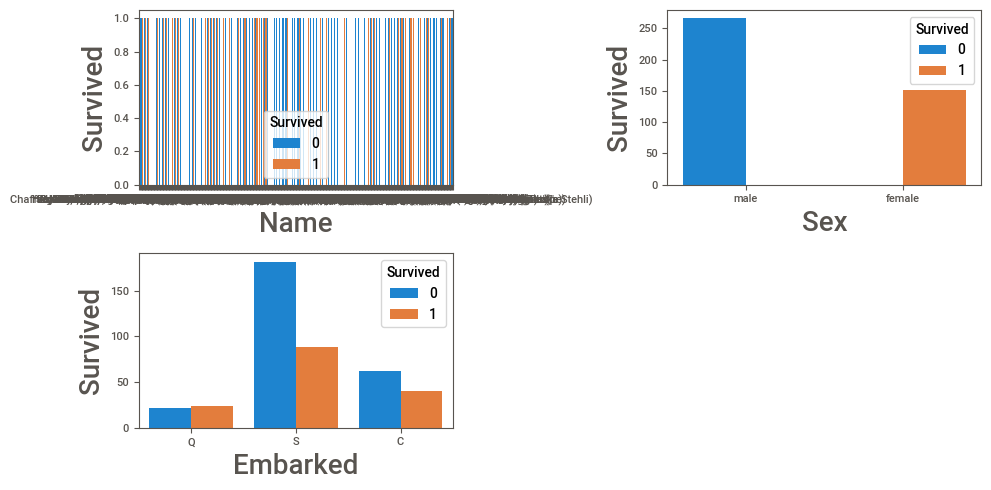

In [16]:
#Analayzing catogorical data

plt.figure(figsize=(10,5), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in d1:
    if plotnumber<=4 :
        ax = plt.subplot(2,2,plotnumber)
        sns.countplot(x=d1[column],hue=data['Survived'])
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('Survived',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

#### There is no relationship between name and the survived rate.

#### Number of female survived are more than males. We cannot see any direct realtion here but can say that female has least number of death.

#### The passenger boarded from Southampton has highest death and passenger embarked from Queenstown has lowest death rate but we can cannot give relation by this data as it ois not sufficiant as the people got on board from Southampton are more in number from other 2 embraked palces.

#### So we cannot state any direct relation between the catogorical attribute and the output attribute.

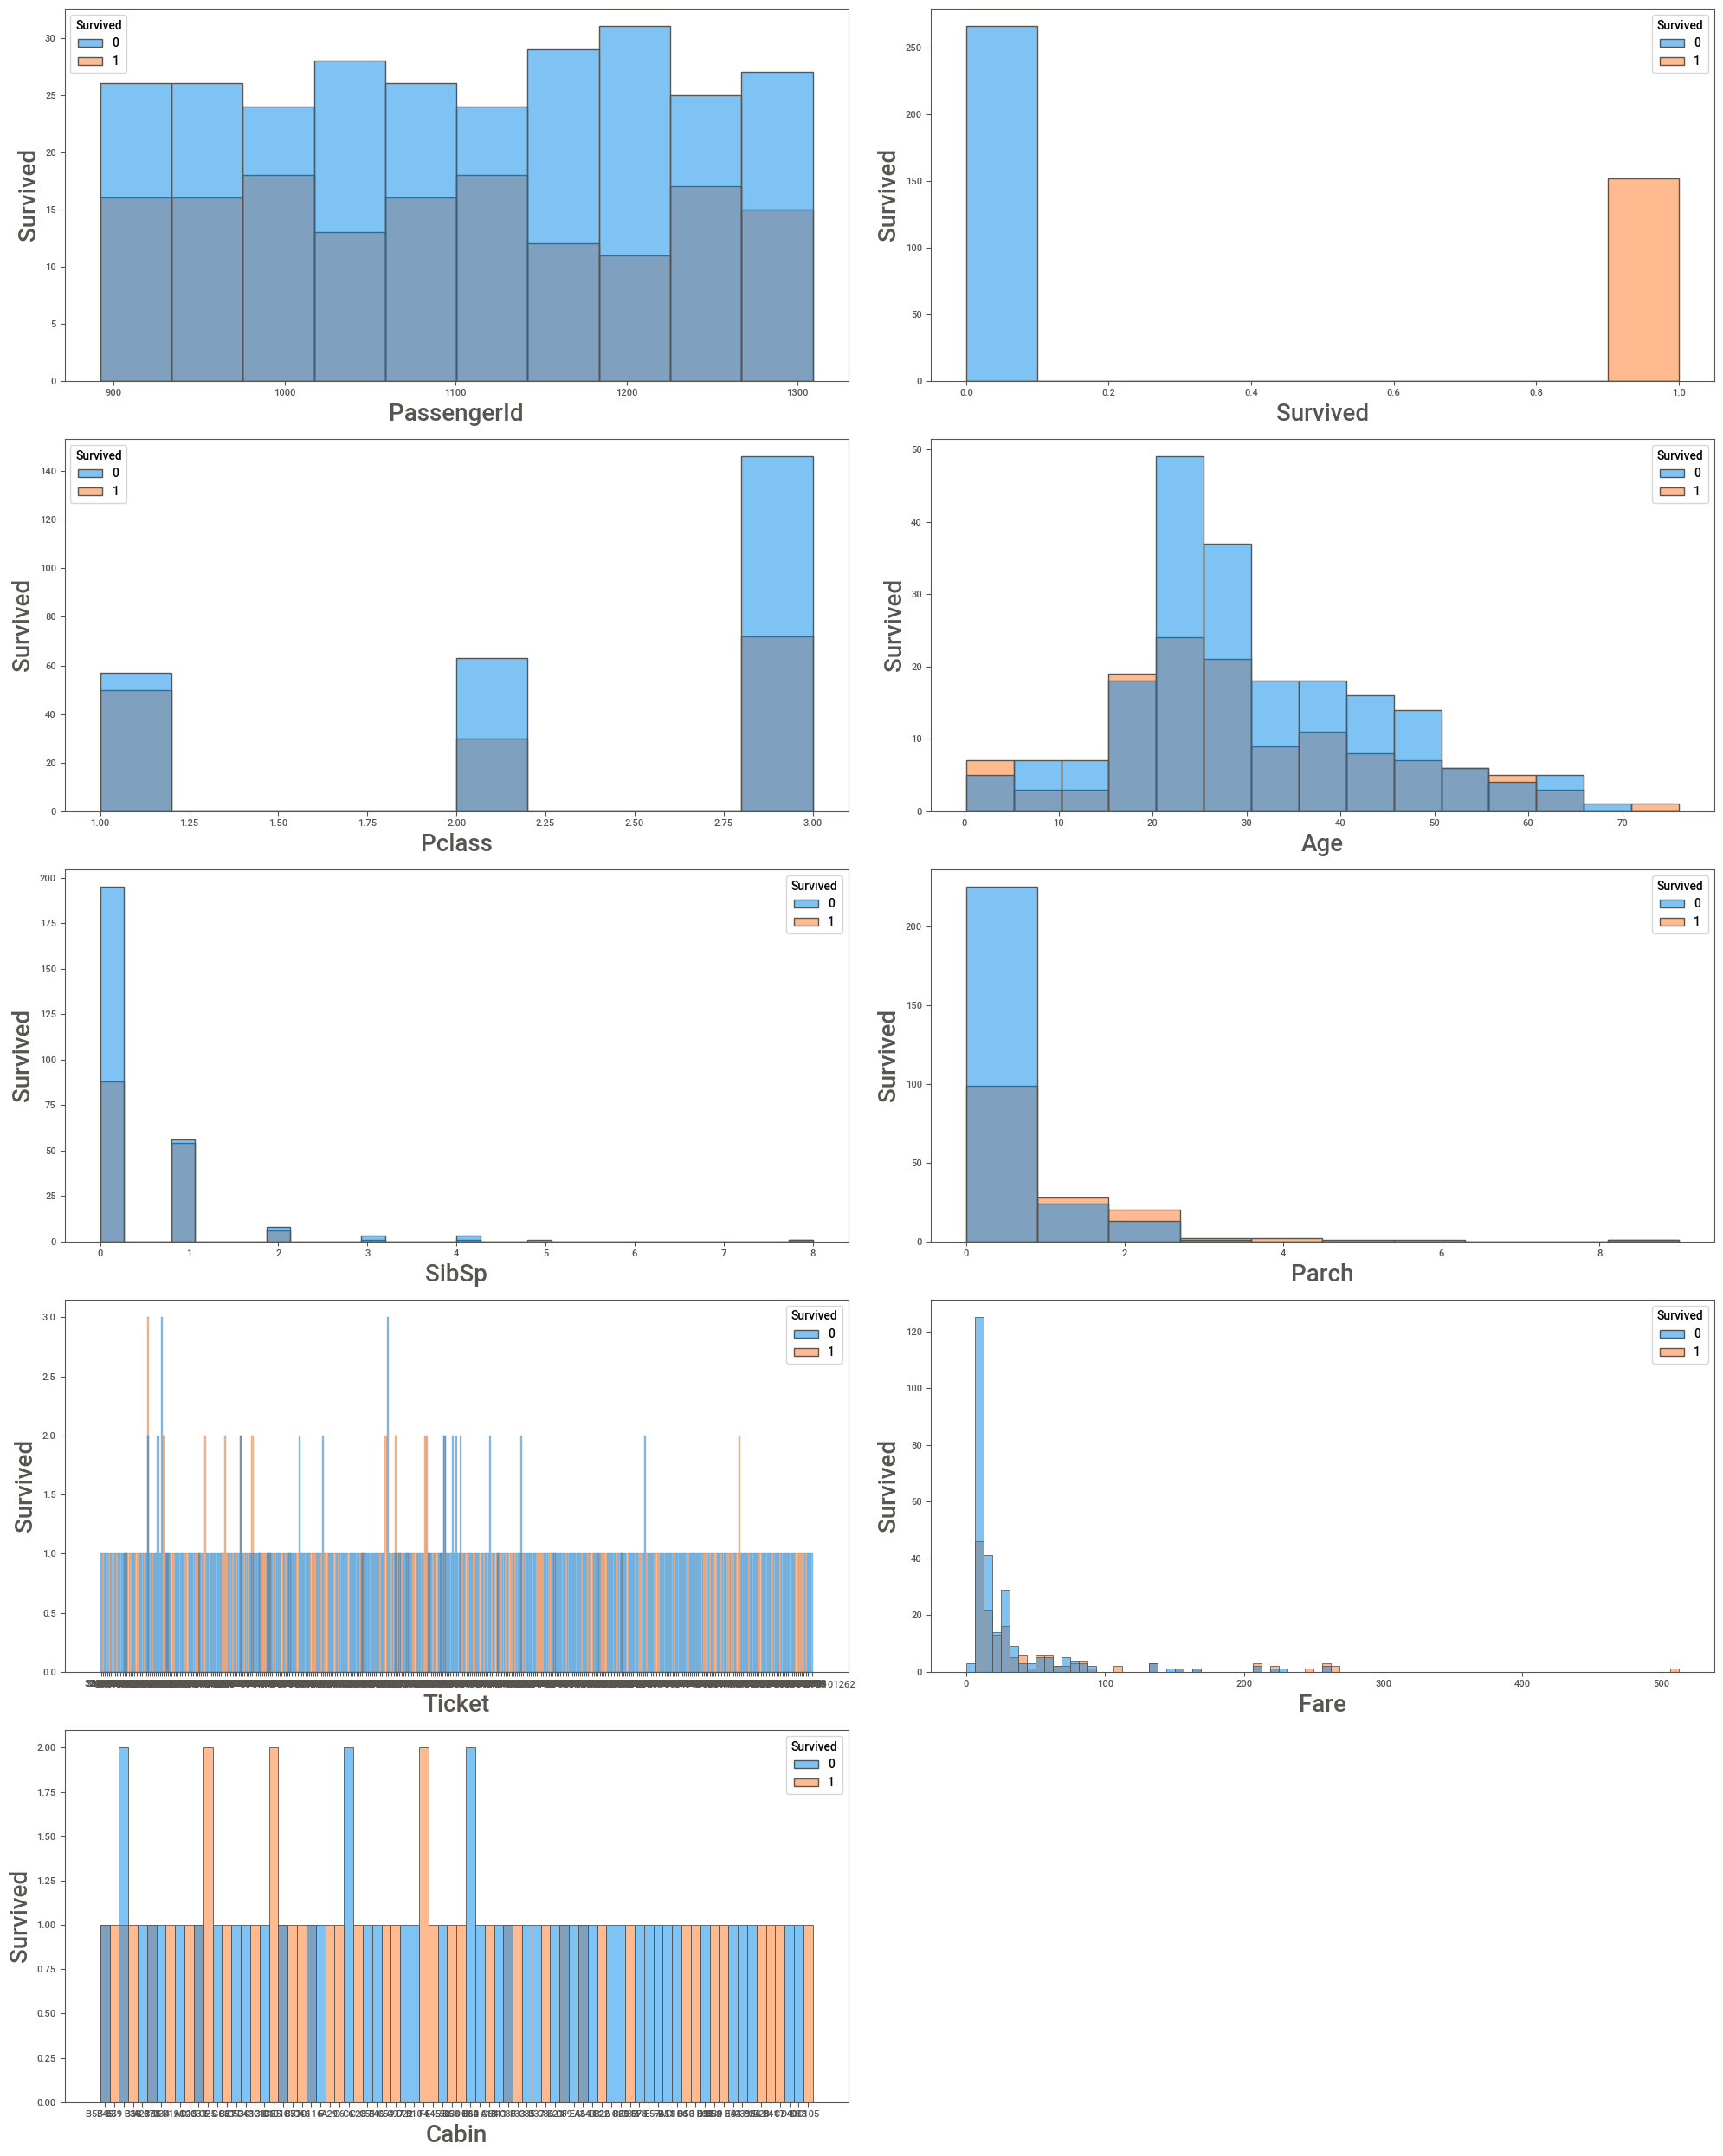

In [19]:
#Analayzing Numerical data
plt.figure(figsize=(20,25), facecolor='white')#To set canvas 
plotnumber = 1

for column in d2:
    if plotnumber<=10 :
        ax = plt.subplot(5,2,plotnumber)
        sns.histplot(x=d2[column],hue=d2['Survived'])
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('Survived',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

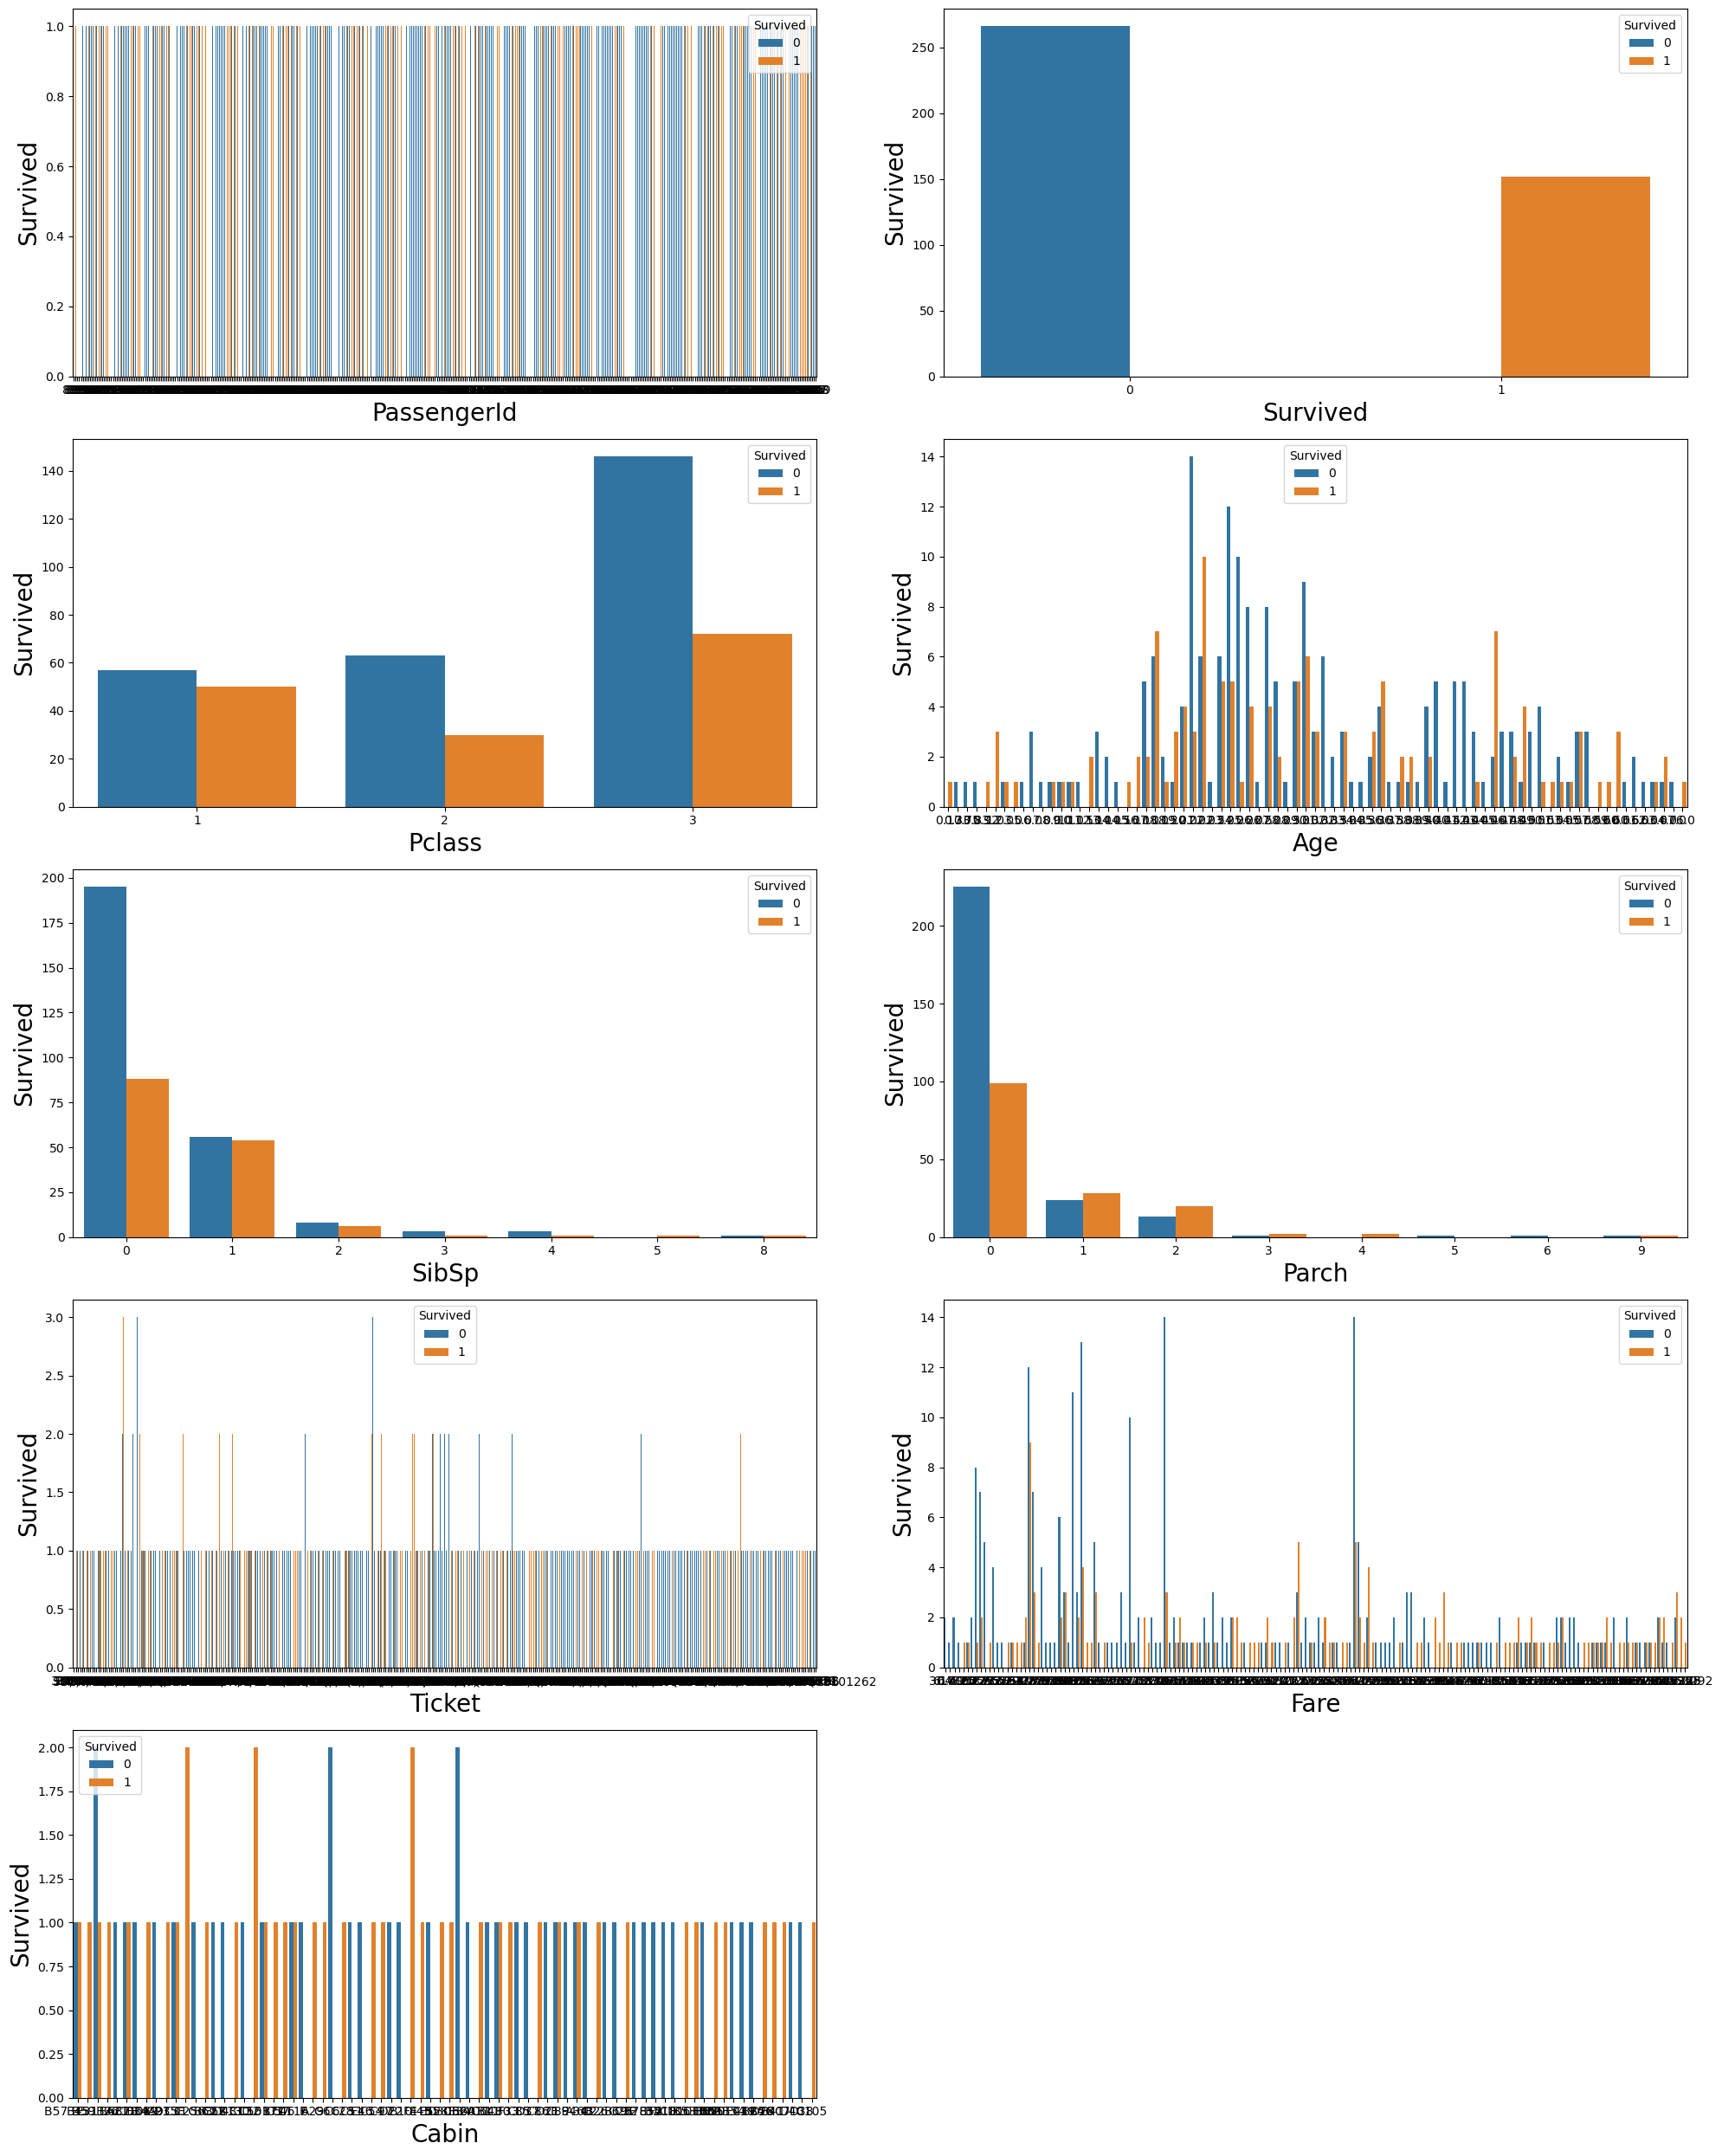

In [7]:
#Analayzing Numerical data
plt.figure(figsize=(20,25), facecolor='white')#To set canvas 
plotnumber = 1

for column in d2:
    if plotnumber<=10 :
        ax = plt.subplot(5,2,plotnumber)
        sns.countplot(x=d2[column],hue=d2['Survived'])
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('Survived',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

#### There is no direct relation seen  between PassengerId, Ticket, Fare, Cabin and the ouput attribute 'Survived'.

#### The number of between age 20 to 40 has large number of deaths.

#### Pclass 3 has more number of deaths and survived passenger comapre to other classes. 

#### Pclass 2 has low number of passenger who survived.

#### Pclass has almost same number of deaths and survived rate.

#### Passenger with no sibling or 1 sibling has more deaths and survived rate.

#### No one with parch 5 and 6 has survived. Parch 0 and 1 has highest death and survived rate.

## Data Preprocessing Pipeline


In [17]:
## Checking missing values

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

##### Cabin

#### Cabin has too many null values, we will drop it as well



In [18]:
data.drop(['Cabin'],axis=1,inplace=True)


##### Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

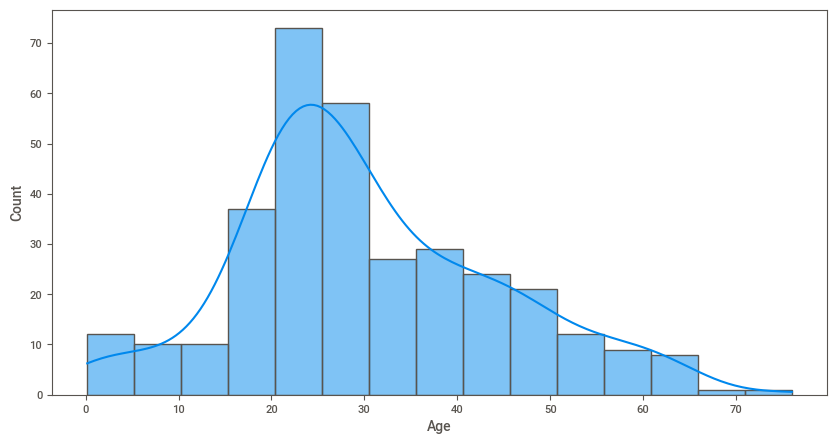

In [19]:
fig,ax=plt.subplots(1,figsize=(10,5))
sns.histplot(data['Age'],kde=True)

#### The distribution of Age is somewhat normal, we will use mean to fill the null values and both distributions before and after are below



In [20]:
data.loc[data['Age'].isnull()==True,'Age']=np.mean(data.Age.dropna(axis=0))


##### Fare

<AxesSubplot:xlabel='Fare', ylabel='Count'>

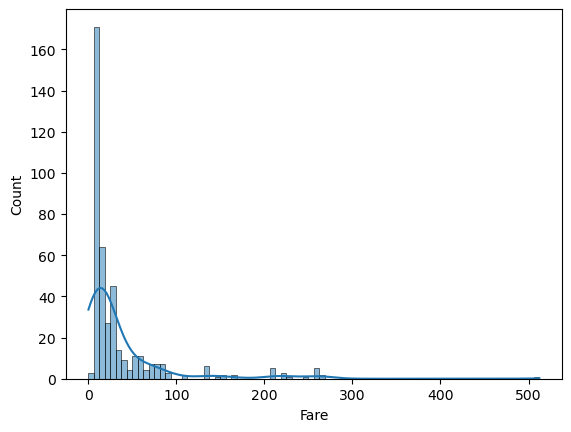

In [26]:
sns.histplot(data['Fare'],kde=True)


#### Fare is right skewed so we will impute it with median



In [21]:
data.loc[data['Fare'].isnull()==True,'Fare']=np.median(data.Fare.dropna(axis=0))

In [22]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#####  Converting the catogerical data into Numerical.

In [23]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [24]:
## One hot encoding
df1=pd.get_dummies(data['Sex'],prefix='Sex',drop_first=True)
data=pd.concat([data,df1],axis=1).drop(['Sex'],axis=1)

In [25]:
data.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [26]:
#converting Embarked variable
data.Embarked=data.Embarked.map({'S':1,'C':2,'Q':3})

In [27]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_male
0,892,0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,3,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,1,0


#### We have used one hot encoding and mapping to convert the categorical data into numerical data.

#### One hot encoding is used for the columns having two unique values.
#### Mapping is used for the columns where unique values are three.


### Checking outliers in the data 

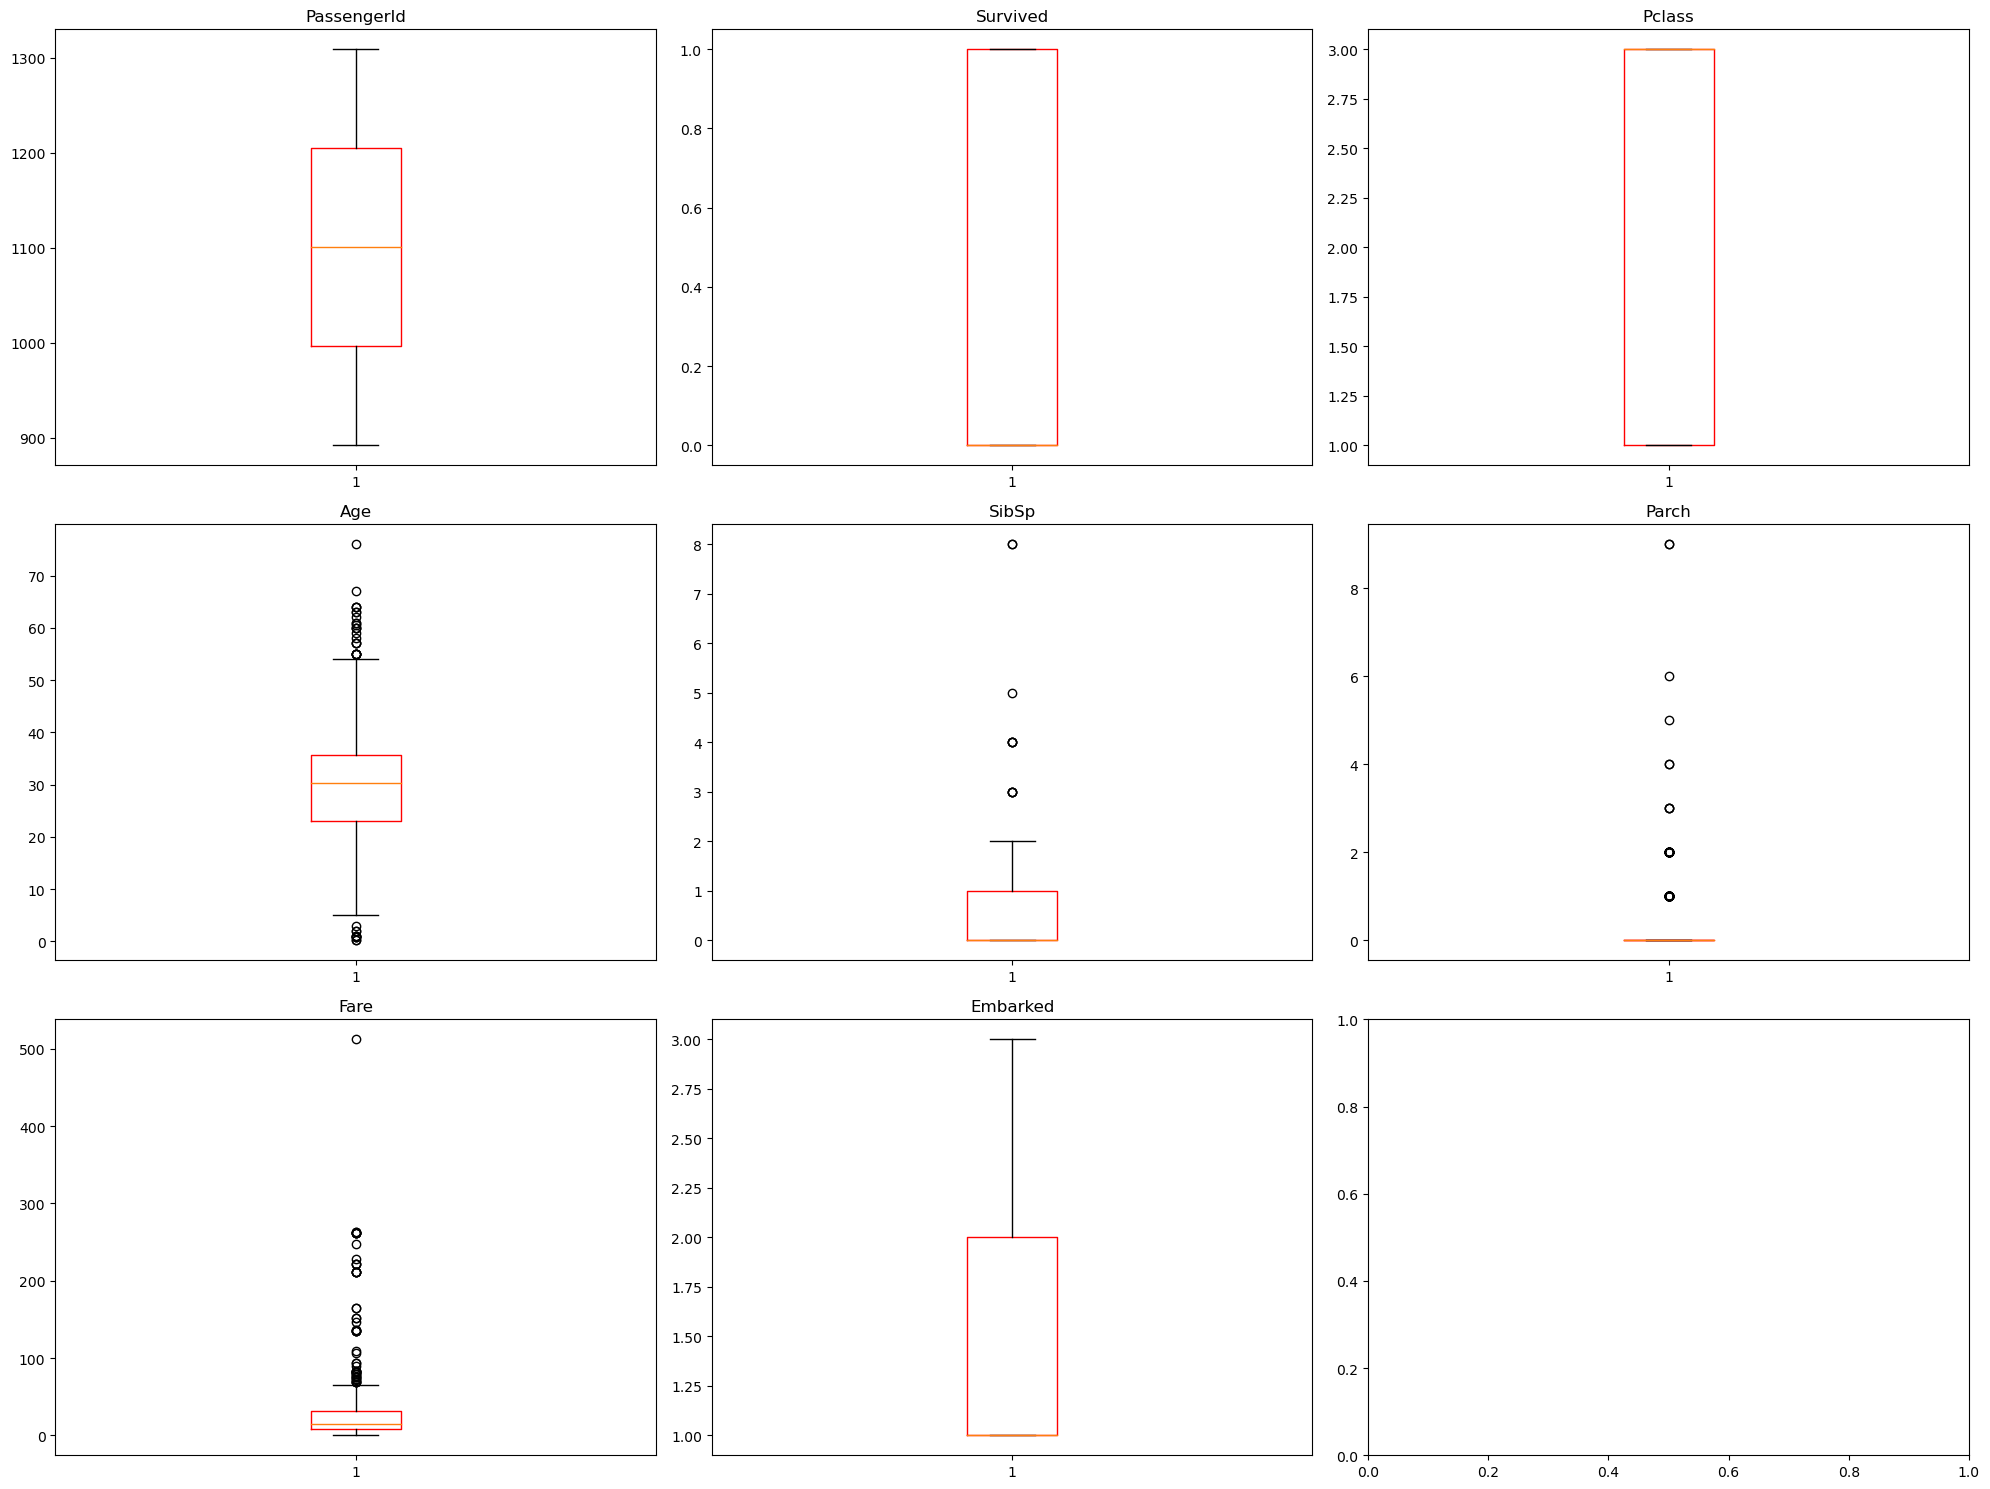

In [39]:
numeric_cols = data.select_dtypes(include=[float, int]).columns
num_plots = len(numeric_cols)
num_cols = 3  # number of columns per row
num_rows = int(np.ceil(num_plots/num_cols))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5*num_rows))

for i, col_name in enumerate(numeric_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].boxplot(data[col_name], boxprops=dict(color='red'))
    axes[row, col].set_title(col_name)


plt.tight_layout()  # adjust subplot spacing
plt.show()

#### Columns like Age, SibSp, Parch, Fare, Embarked  are  having outliers.

##### Age

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


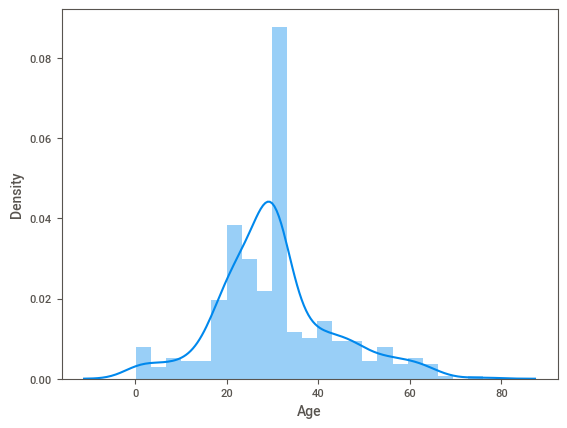

In [28]:
#to check the distribution of Age
sns.distplot(data.Age)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


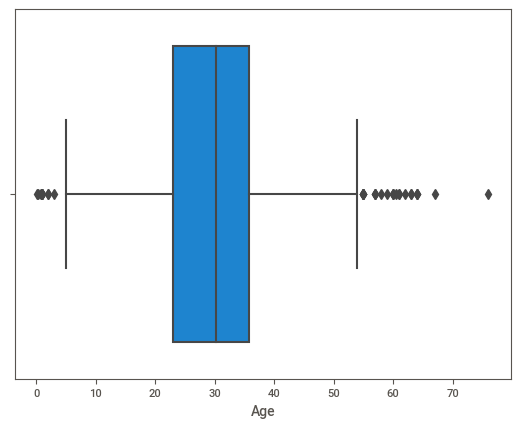

In [29]:
#to check outliers in NumCompaniesWorked
sns.boxplot(data.Age)
plt.show()


#### Outliers present in both max and min limit

In [30]:
#calculating the IQR range
from scipy import stats
IQR=stats.iqr(data.Age,interpolation='midpoint')
IQR
Q1=data.Age.quantile(0.25)
Q3=data.Age.quantile(0.75)
min_limit=Q1-1.5 *IQR
max_limit=Q3+1.5*IQR


In [31]:
#checking the outliers in max_limit
data.loc[data['Age']>max_limit]

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_male
2,894,0,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,3,1
13,905,0,2,"Howard, Mr. Benjamin",63.0,1,0,24065,26.0000,1,1
20,912,0,1,"Rothschild, Mr. Martin",55.0,1,0,PC 17603,59.4000,2,1
48,940,1,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",60.0,0,0,11813,76.2917,2,0
69,961,1,1,"Fortune, Mrs. Mark (Mary McDougald)",60.0,1,4,19950,263.0000,1,0
77,969,1,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",55.0,2,0,11770,25.7000,1,0
81,973,0,1,"Straus, Mr. Isidor",67.0,1,0,PC 17483,221.7792,1,1
96,988,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",76.0,1,0,19877,78.8500,1,0
114,1006,1,1,"Straus, Mrs. Isidor (Rosalie Ida Blun)",63.0,1,0,PC 17483,221.7792,1,0
142,1034,0,1,"Ryerson, Mr. Arthur Larned",61.0,1,3,PC 17608,262.3750,2,1


In [32]:
#checking the outliers in min_limit
data.loc[data['Age']<min_limit]

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_male
89,981,0,2,"Wells, Master. Ralph Lester",2.00,1,1,29103,23.0000,1,1
117,1009,1,3,"Sandstrom, Miss. Beatrice Irene",1.00,1,1,PP 9549,16.7000,1,0
201,1093,0,3,"Danbom, Master. Gilbert Sigvard Emanuel",0.33,0,2,347080,14.4000,1,1
250,1142,1,2,"West, Miss. Barbara J",0.92,1,2,C.A. 34651,27.7500,1,0
263,1155,1,3,"Klasen, Miss. Gertrud Emilia",1.00,1,1,350405,12.1833,1,0
281,1173,0,3,"Peacock, Master. Alfred Edward",0.75,1,1,SOTON/O.Q. 3101315,13.7750,1,1
284,1176,1,3,"Rosblom, Miss. Salli Helena",2.00,1,1,370129,20.2125,1,0
296,1188,1,2,"Laroche, Miss. Louise",1.00,1,2,SC/Paris 2123,41.5792,2,0
307,1199,0,3,"Aks, Master. Philip Frank",0.83,0,1,392091,9.3500,1,1
354,1246,1,3,"Dean, Miss. Elizabeth Gladys Millvina""""",0.17,1,2,C.A. 2315,20.5750,1,0


In [33]:
#checking the outliers in max_limit
len(data.loc[data['Age']>max_limit])

25

In [34]:
#checking the outliers in min_limit
len(data.loc[data['Age']<min_limit])

11

In [35]:
data.shape

(418, 11)

In [36]:
#calculating the percent of outliers in max limit
25 / 418 *100


5.980861244019139

##### As the outliers in the max_limit are more than 5% .So we are not going to handle them as they must be showing any trend. 

In [37]:
#calculating the percent of outliers in min limit
11 / 418 *100


2.631578947368421

##### As the outliers in the min_limit are not more than 5% we have to handle them. 

##### We will use Median to handle the outliers.

In [38]:
# Handling the outliers with the help of median.
data.loc[data['Age']<min_limit,'Age']=np.median(data.Age)

##### SibSp

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


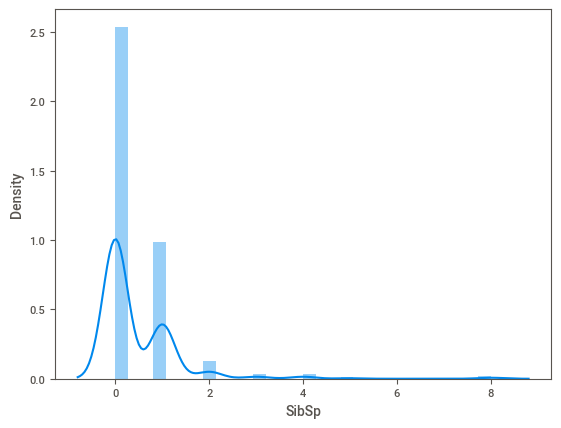

In [39]:
#Checking the distribution of SibSp
sns.distplot(data.SibSp)
plt.show()


#### The distribution is postivily skewed. we are going to use IQR method


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


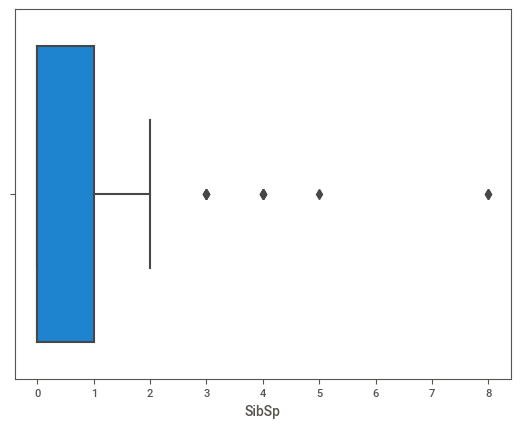

In [40]:
sns.boxplot(data.SibSp)
plt.show()

#### outliers present in the max limit.

In [41]:
#calculating the IQR range
from scipy import stats
IQR=stats.iqr(data.SibSp,interpolation='midpoint')
IQR
Q1=data.SibSp.quantile(0.25)
Q3=data.SibSp.quantile(0.75)
min_limit=Q1-1.5 *IQR
max_limit=Q3+1.5*IQR


In [42]:
#Checking outliers in the max limi
data.loc[data['SibSp']>max_limit]

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_male
53,945,1,1,"Fortune, Miss. Ethel Flora",28.00000,3,2,19950,263.0000,1,0
55,947,0,3,"Rice, Master. Albert",10.00000,4,1,382652,29.1250,3,1
140,1032,1,3,"Goodwin, Miss. Jessie Allis",10.00000,5,2,CA 2144,46.9000,1,0
145,1037,0,3,"Vander Planke, Mr. Julius",31.00000,3,0,345763,18.0000,1,1
154,1046,0,3,"Asplund, Master. Filip Oscar",13.00000,4,2,347077,31.3875,1,1
188,1080,1,3,"Sage, Miss. Ada",30.27259,8,2,CA. 2343,69.5500,1,0
214,1106,1,3,"Andersson, Miss. Ida Augusta Margareta",38.00000,4,2,347091,7.7750,1,0
360,1252,0,3,"Sage, Master. William Henry",14.50000,8,2,CA. 2343,69.5500,1,1
379,1271,0,3,"Asplund, Master. Carl Edgar",5.00000,4,2,347077,31.3875,1,1
389,1281,0,3,"Palsson, Master. Paul Folke",6.00000,3,1,349909,21.0750,1,1


In [43]:
len(data.loc[data['SibSp']>max_limit])

11

In [44]:
#calculating the percent of outliers in max limit
11 / 418 *100


2.631578947368421

##### As the outliers in the max_limit are not more than 5% we have to handle them. 

##### We will use Median to handle the outliers.

In [45]:
# Handling the outliers with the help of median.
data.loc[data['SibSp']>max_limit,'SibSp']=np.median(data.SibSp)

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


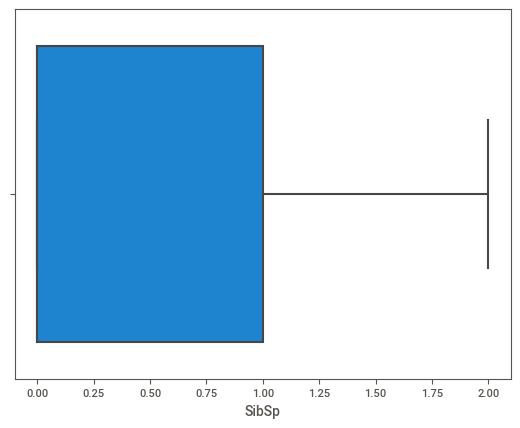

In [46]:
sns.boxplot(data.SibSp)
plt.show()

##### Parch

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


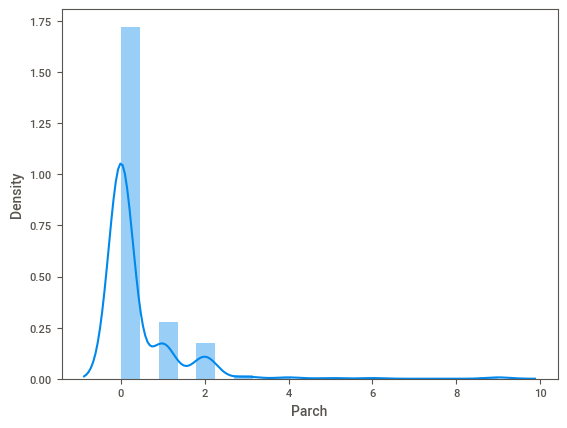

In [47]:
#Checking the distribution of SibSp
sns.distplot(data.Parch)
plt.show()


#### The distribution is postivily skewed. we are going to use IQR method


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


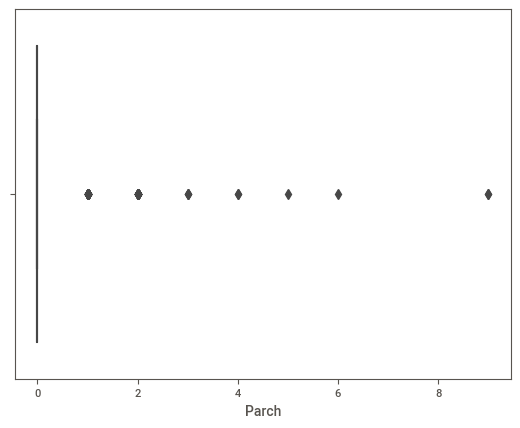

In [48]:
sns.boxplot(data.Parch)
plt.show()

##### Outliers present in the max limit

In [49]:
#calculating the IQR range
from scipy import stats
IQR=stats.iqr(data.Parch,interpolation='midpoint')
IQR
Q1=data.Parch.quantile(0.25)
Q3=data.Parch.quantile(0.75)
min_limit=Q1-1.5 *IQR
max_limit=Q3+1.5*IQR


In [50]:
#Checking outliers in the max limi
data.loc[data['Parch']>max_limit]

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_male
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.00000,1,1,3101298,12.2875,1,0
7,899,0,2,"Caldwell, Mr. Albert Francis",26.00000,1,1,248738,29.0000,1,1
21,913,0,3,"Olsen, Master. Artur Karl",9.00000,0,1,C 17368,3.1708,1,1
23,915,0,1,"Williams, Mr. Richard Norris II",21.00000,0,1,PC 17597,61.3792,2,1
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",48.00000,1,3,PC 17608,262.3750,2,0
...,...,...,...,...,...,...,...,...,...,...,...
397,1289,1,1,"Frolicher-Stehli, Mrs. Maxmillian (Margaretha ...",48.00000,1,1,13567,79.2000,2,0
402,1294,1,1,"Gibson, Miss. Dorothy Winifred",22.00000,0,1,112378,59.4000,2,0
407,1299,0,1,"Widener, Mr. George Dunton",50.00000,1,1,113503,211.5000,2,1
409,1301,1,3,"Peacock, Miss. Treasteall",30.27259,1,1,SOTON/O.Q. 3101315,13.7750,1,0


In [51]:
len(data.loc[data['Parch']>max_limit])

94

In [52]:
#calculating the percent of outliers in max limit
94/ 418 *100


22.48803827751196

#### As the outliers in the max_limit are more than 5% .So we are not going to handle them as they must be showing any trend. 

##### Fare

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


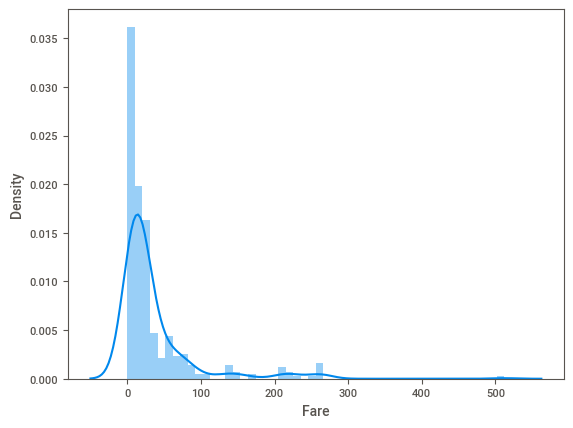

In [53]:
#Checking the distribution of SibSp
sns.distplot(data.Fare)
plt.show()


#### The distribution is postivily skewed. we are going to use IQR method


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


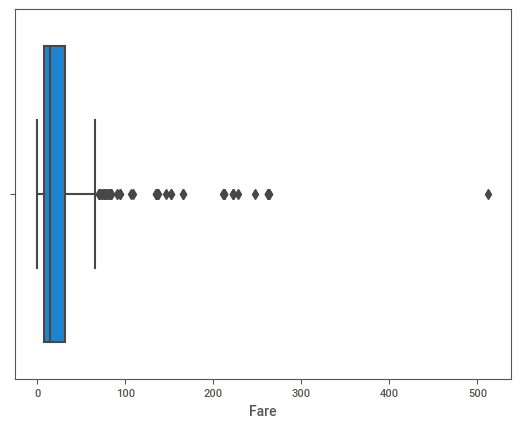

In [54]:
sns.boxplot(data.Fare)
plt.show()

##### Outliers present in the max limit

In [55]:
#calculating the IQR range
from scipy import stats
IQR=stats.iqr(data.Fare,interpolation='midpoint')
IQR
Q1=data.Fare.quantile(0.25)
Q3=data.Fare.quantile(0.75)
min_limit=Q1-1.5 *IQR
max_limit=Q3+1.5*IQR


In [56]:
#Checking outliers in the max limi
data.loc[data['Fare']>max_limit]

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_male
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",23.00000,1,0,21228,82.2667,1,0
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",48.00000,1,3,PC 17608,262.3750,2,0
48,940,1,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",60.00000,0,0,11813,76.2917,2,0
53,945,1,1,"Fortune, Miss. Ethel Flora",28.00000,0,2,19950,263.0000,1,0
59,951,1,1,"Chaudanson, Miss. Victorine",36.00000,0,0,PC 17608,262.3750,2,0
64,956,0,1,"Ryerson, Master. John Borie",13.00000,2,2,PC 17608,262.3750,2,1
69,961,1,1,"Fortune, Mrs. Mark (Mary McDougald)",60.00000,1,4,19950,263.0000,1,0
74,966,1,1,"Geiger, Miss. Amalie",35.00000,0,0,113503,211.5000,2,0
75,967,0,1,"Keeping, Mr. Edwin",32.50000,0,0,113503,211.5000,2,1
81,973,0,1,"Straus, Mr. Isidor",67.00000,1,0,PC 17483,221.7792,1,1


In [57]:
len(data.loc[data['Fare']>max_limit])

55

In [58]:
#calculating the percent of outliers in max limit
55 / 418 *100


13.157894736842104

#### As the outliers in the max_limit are more than 5% .So we are not going to handle them as they must be showing any trend. 


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    int64  
 10  Sex_male     418 non-null    uint8  
dtypes: float64(2), int64(6), object(2), uint8(1)
memory usage: 33.2+ KB


All the outliers are handled.

In [61]:
#checking the value_count of output
data.Survived.value_counts()

0    266
1    152
Name: Survived, dtype: int64

## Feature Selection

In [62]:
data.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)


##### 'PassengerId','Name','Ticket'are unique identity of the dataset and dropping it as it is of no use for analysis.


<AxesSubplot:>

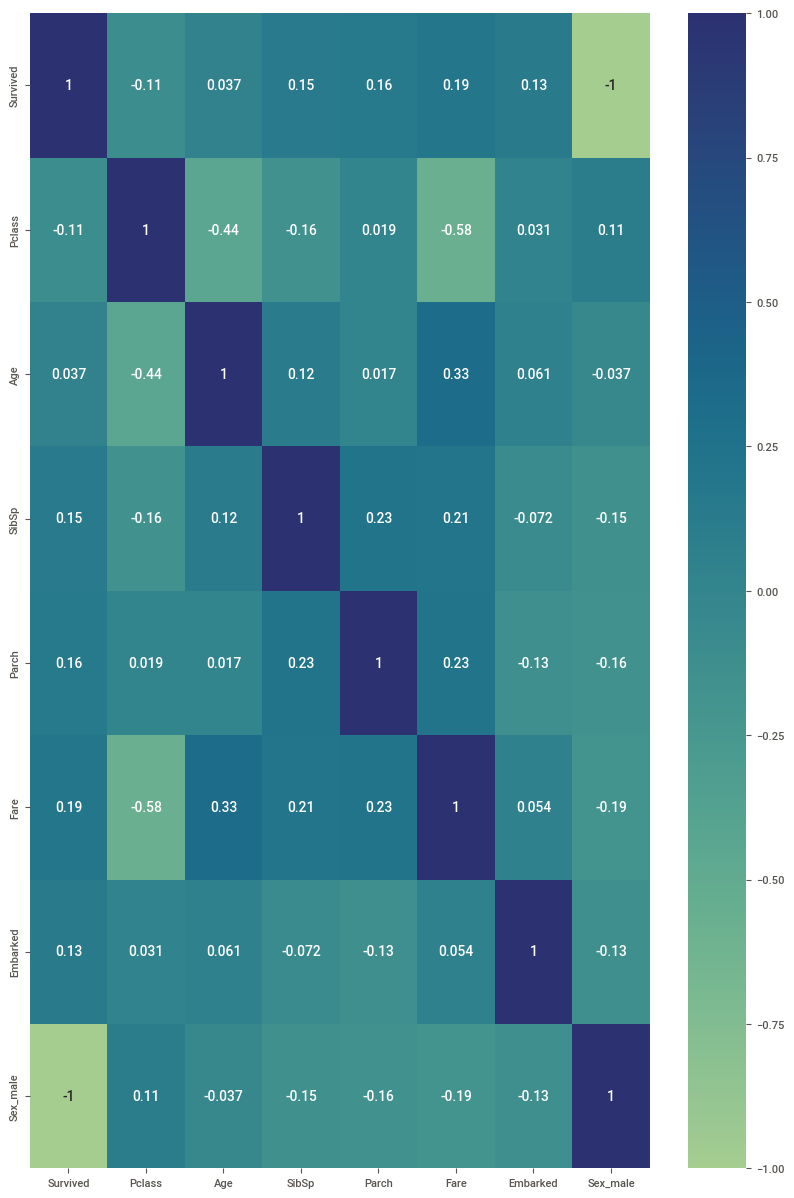

In [63]:
plt.figure(figsize=(10, 15))
sns.heatmap(data.corr(),annot=True,cmap = "crest")

### With the help of heatmap we can see that there are no feature who are crossing the threshold that is 0.9 so we can say that no feature is highly correlated to each other. 

In [64]:
## Checking duplicate in the data 
data.duplicated().sum()
#there are 38 duplicate

38

In [65]:
# Drop duplicate rows
data = data.drop_duplicates()


In [66]:
data.duplicated().sum()


0

## Model Creation

In [67]:
## creating independent and dependent variables
X = data.drop('Survived',axis =1)
y = data['Survived']


In [68]:
## creating training and testing data for Logistic Regression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,random_state=43)

# Logistic Regression

Logistic regression is a supervised machine learning algorithm mainly used for classification tasks where the goal is to predict the probability that an instance of belonging to a given class. 


In [69]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

### Fitting my model to the train file

logreg.fit(X_train,y_train)


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score,ConfusionMatrixDisplay

#### Traning score

In [93]:
ylk_pred=logreg.predict(X_train)


In [95]:
score=f1_score(y_train,ylk_pred)
score

1.0

In [96]:
a=accuracy_score(y_train,ylk_pred)
a

1.0

#### Testing score

In [98]:
LR_y_train_predict=logreg.predict(X_test)
LR_y_train_predict

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [99]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,LR_y_train_predict) * 100


100.0

In [100]:
recall=recall_score(y_test,LR_y_train_predict)
recall

1.0

In [101]:
precision=precision_score(y_test,LR_y_train_predict)
precision

1.0

In [102]:
f1score=f1_score(y_test,LR_y_train_predict)
f1score

1.0

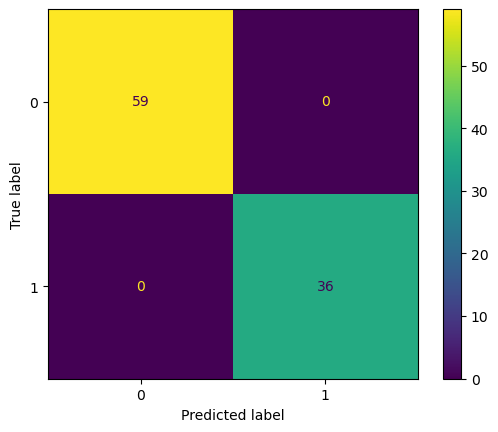

In [103]:
cm = confusion_matrix(y_test, LR_y_train_predict, labels=logreg.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
display.plot()


In [82]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X, y, cv=5, scoring='f1_macro')
scores

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

array([1., 1., 1., 1., 1.])

## Logistic regression is giving 100% result.
## The model is working excellent in both testing and training dataset.
## All the classes are predicted right.
## The cross validation score is also 100% . So we can say that the algorithm is working prefect.

# Support Vector Machine

SVM is a powerful supervised algorithm that works best on smaller datasets but on complex ones. Support Vector Machine, abbreviated as SVM can be used for both regression and classification tasks, but generally, they work best in classification problems.


In [87]:
# Support Vector Classifier Model

from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters ###onject creation
svclassifier.fit(X_train , y_train)#traning of the classifier

SVC()

In [88]:
# Predict output for X_test
y_hat1=svclassifier.predict(X_test)
y_hat1

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [89]:
## evaluating the model created
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
acc_svm=accuracy_score(y_test,y_hat1)
acc_svm

0.6526315789473685

In [90]:
recall_svm=recall_score(y_test,y_hat1)
recall_svm

0.19444444444444445

In [91]:
pre_svm=precision_score(y_test,y_hat1)
pre_svm

0.6363636363636364

In [92]:
# F1 score considers both Precision and Recall for evaluating a model
f1=f1_score(y_test,y_hat1)
f1

0.29787234042553196

In [93]:
# Calssification report measures the quality of predictions. True Positives, False Positives, True negatives and False Negatives 
# are used to predict the metrics of a classification report 

print(classification_report(y_test,y_hat1))

              precision    recall  f1-score   support

           0       0.65      0.93      0.77        59
           1       0.64      0.19      0.30        36

    accuracy                           0.65        95
   macro avg       0.65      0.56      0.53        95
weighted avg       0.65      0.65      0.59        95



## SVM is not performing well for this dataset.
## The model is giving 29% as F1 score which is not a good score.
## Therefor we are going to do some huperparameter tunning to see if the model performs well or not.

#### Hyperparameter Tunning

In [94]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [10,5,1,2],   ## 0.1,5,10,50,60,70
              'gamma': [0.001,0.002,0.003], ## 0.001,0.002,0.003
             'random_state':(list(range(1, 20)))} 
model=SVC()#create empty model that is model on default hyperparameters
grid = GridSearchCV(model, param_grid, refit = True, verbose = 2,scoring='f1',cv=5)#verbose=shows the outcome
  
# fitting the model for grid search
grid.fit(X,y)

Fitting 5 folds for each of 228 candidates, totalling 1140 fits
[CV] END ..................C=10, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=10, gamma=0.001,

[CV] END ..................C=10, gamma=0.002, random_state=3; total time=   0.0s
[CV] END ..................C=10, gamma=0.002, random_state=4; total time=   0.0s
[CV] END ..................C=10, gamma=0.002, random_state=4; total time=   0.0s
[CV] END ..................C=10, gamma=0.002, random_state=4; total time=   0.0s
[CV] END ..................C=10, gamma=0.002, random_state=4; total time=   0.0s
[CV] END ..................C=10, gamma=0.002, random_state=4; total time=   0.0s
[CV] END ..................C=10, gamma=0.002, random_state=5; total time=   0.0s
[CV] END ..................C=10, gamma=0.002, random_state=5; total time=   0.0s
[CV] END ..................C=10, gamma=0.002, random_state=5; total time=   0.0s
[CV] END ..................C=10, gamma=0.002, random_state=5; total time=   0.0s
[CV] END ..................C=10, gamma=0.002, random_state=5; total time=   0.0s
[CV] END ..................C=10, gamma=0.002, random_state=6; total time=   0.0s
[CV] END ..................C

[CV] END ..................C=10, gamma=0.003, random_state=5; total time=   0.0s
[CV] END ..................C=10, gamma=0.003, random_state=5; total time=   0.0s
[CV] END ..................C=10, gamma=0.003, random_state=5; total time=   0.0s
[CV] END ..................C=10, gamma=0.003, random_state=5; total time=   0.0s
[CV] END ..................C=10, gamma=0.003, random_state=6; total time=   0.0s
[CV] END ..................C=10, gamma=0.003, random_state=6; total time=   0.0s
[CV] END ..................C=10, gamma=0.003, random_state=6; total time=   0.0s
[CV] END ..................C=10, gamma=0.003, random_state=6; total time=   0.0s
[CV] END ..................C=10, gamma=0.003, random_state=6; total time=   0.0s
[CV] END ..................C=10, gamma=0.003, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=0.003, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=0.003, random_state=7; total time=   0.0s
[CV] END ..................C

[CV] END ...................C=5, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ..................C

[CV] END ..................C=5, gamma=0.002, random_state=10; total time=   0.0s
[CV] END ..................C=5, gamma=0.002, random_state=10; total time=   0.0s
[CV] END ..................C=5, gamma=0.002, random_state=11; total time=   0.0s
[CV] END ..................C=5, gamma=0.002, random_state=11; total time=   0.0s
[CV] END ..................C=5, gamma=0.002, random_state=11; total time=   0.0s
[CV] END ..................C=5, gamma=0.002, random_state=11; total time=   0.0s
[CV] END ..................C=5, gamma=0.002, random_state=11; total time=   0.0s
[CV] END ..................C=5, gamma=0.002, random_state=12; total time=   0.0s
[CV] END ..................C=5, gamma=0.002, random_state=12; total time=   0.0s
[CV] END ..................C=5, gamma=0.002, random_state=12; total time=   0.0s
[CV] END ..................C=5, gamma=0.002, random_state=12; total time=   0.0s
[CV] END ..................C=5, gamma=0.002, random_state=12; total time=   0.0s
[CV] END ..................C

[CV] END ..................C=5, gamma=0.003, random_state=14; total time=   0.0s
[CV] END ..................C=5, gamma=0.003, random_state=14; total time=   0.0s
[CV] END ..................C=5, gamma=0.003, random_state=14; total time=   0.0s
[CV] END ..................C=5, gamma=0.003, random_state=14; total time=   0.0s
[CV] END ..................C=5, gamma=0.003, random_state=14; total time=   0.0s
[CV] END ..................C=5, gamma=0.003, random_state=15; total time=   0.0s
[CV] END ..................C=5, gamma=0.003, random_state=15; total time=   0.0s
[CV] END ..................C=5, gamma=0.003, random_state=15; total time=   0.0s
[CV] END ..................C=5, gamma=0.003, random_state=15; total time=   0.0s
[CV] END ..................C=5, gamma=0.003, random_state=15; total time=   0.0s
[CV] END ..................C=5, gamma=0.003, random_state=16; total time=   0.0s
[CV] END ..................C=5, gamma=0.003, random_state=16; total time=   0.0s
[CV] END ..................C

[CV] END ..................C=1, gamma=0.001, random_state=15; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=15; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=15; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=16; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=16; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=16; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=16; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=16; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ..................C

[CV] END ..................C=1, gamma=0.002, random_state=17; total time=   0.0s
[CV] END ..................C=1, gamma=0.002, random_state=17; total time=   0.0s
[CV] END ..................C=1, gamma=0.002, random_state=17; total time=   0.0s
[CV] END ..................C=1, gamma=0.002, random_state=17; total time=   0.0s
[CV] END ..................C=1, gamma=0.002, random_state=18; total time=   0.0s
[CV] END ..................C=1, gamma=0.002, random_state=18; total time=   0.0s
[CV] END ..................C=1, gamma=0.002, random_state=18; total time=   0.0s
[CV] END ..................C=1, gamma=0.002, random_state=18; total time=   0.0s
[CV] END ..................C=1, gamma=0.002, random_state=18; total time=   0.0s
[CV] END ..................C=1, gamma=0.002, random_state=19; total time=   0.0s
[CV] END ..................C=1, gamma=0.002, random_state=19; total time=   0.0s
[CV] END ..................C=1, gamma=0.002, random_state=19; total time=   0.0s
[CV] END ..................C

[CV] END ...................C=2, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ...................C=2, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ...................C=2, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ...................C=2, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ...................C=2, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ...................C=2, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ...................C=2, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ...................C=2, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ...................C=2, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ...................C=2, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ...................C=2, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ...................C=2, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ...................

[CV] END ...................C=2, gamma=0.002, random_state=4; total time=   0.0s
[CV] END ...................C=2, gamma=0.002, random_state=4; total time=   0.0s
[CV] END ...................C=2, gamma=0.002, random_state=4; total time=   0.0s
[CV] END ...................C=2, gamma=0.002, random_state=4; total time=   0.0s
[CV] END ...................C=2, gamma=0.002, random_state=4; total time=   0.0s
[CV] END ...................C=2, gamma=0.002, random_state=5; total time=   0.0s
[CV] END ...................C=2, gamma=0.002, random_state=5; total time=   0.0s
[CV] END ...................C=2, gamma=0.002, random_state=5; total time=   0.0s
[CV] END ...................C=2, gamma=0.002, random_state=5; total time=   0.0s
[CV] END ...................C=2, gamma=0.002, random_state=5; total time=   0.0s
[CV] END ...................C=2, gamma=0.002, random_state=6; total time=   0.0s
[CV] END ...................C=2, gamma=0.002, random_state=6; total time=   0.0s
[CV] END ...................

[CV] END ...................C=2, gamma=0.003, random_state=7; total time=   0.0s
[CV] END ...................C=2, gamma=0.003, random_state=7; total time=   0.0s
[CV] END ...................C=2, gamma=0.003, random_state=7; total time=   0.0s
[CV] END ...................C=2, gamma=0.003, random_state=7; total time=   0.0s
[CV] END ...................C=2, gamma=0.003, random_state=8; total time=   0.0s
[CV] END ...................C=2, gamma=0.003, random_state=8; total time=   0.0s
[CV] END ...................C=2, gamma=0.003, random_state=8; total time=   0.0s
[CV] END ...................C=2, gamma=0.003, random_state=8; total time=   0.0s
[CV] END ...................C=2, gamma=0.003, random_state=8; total time=   0.0s
[CV] END ...................C=2, gamma=0.003, random_state=9; total time=   0.0s
[CV] END ...................C=2, gamma=0.003, random_state=9; total time=   0.0s
[CV] END ...................C=2, gamma=0.003, random_state=9; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [10, 5, 1, 2], 'gamma': [0.001, 0.002, 0.003],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='f1', verbose=2)

In [95]:
print(grid.best_params_)

{'C': 10, 'gamma': 0.002, 'random_state': 1}


In [96]:
clf=SVC(C=10, gamma=0.002,random_state=1)
clf.fit(X_train, y_train)

SVC(C=10, gamma=0.002, random_state=1)

In [97]:
y_clf=clf.predict(X_test)

In [98]:
Pre=precision_score(y_test,y_clf)
Pre

0.8484848484848485

In [99]:
Recall=recall_score(y_test,y_clf)
Recall

0.7777777777777778

In [100]:
f1=f1_score(y_test,y_clf)
f1

0.8115942028985507

In [101]:
print(classification_report(y_test,y_clf))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89        59
           1       0.85      0.78      0.81        36

    accuracy                           0.86        95
   macro avg       0.86      0.85      0.85        95
weighted avg       0.86      0.86      0.86        95



In [102]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
scores

array([0.81754386, 0.87179007, 0.88985507, 0.83272194, 0.76156863])

## After parameter tunning the SVM aglorithm is performing good with a F1 score of 81%.
## The cross validation score is also near 81% . So we can say that the algorithm is working good after hyperparameter tunning.

# DecisionTree 

A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.


In [103]:
from sklearn.tree import DecisionTreeClassifier
#importing decision tree from sklearn.tree
dt=DecisionTreeClassifier()
#object creation for decision tree  
dt.fit(X_train ,y_train)
#training the model
y_hat=dt.predict(X_test)#prediction
y_hat#predicted values 

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [104]:
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
test_acc=accuracy_score(y_test,y_hat)#testing accuracy 
test_acc

1.0

In [105]:
## test score
test_f1=f1_score(y_test,y_hat)#f1 score
test_f1

1.0

In [106]:
##train score
yDT_pred=logreg.predict(X_train)
tes_f1=f1_score(y_train,yDT_pred)#f1 score
tes_f1

1.0

In [107]:
P_score=precision_score(y_test,y_hat)
P_score   

1.0

In [108]:
re_sco=recall_score(y_test,y_hat)
re_sco

1.0

In [109]:
print(classification_report(y_test,y_hat))# for  testing 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        36

    accuracy                           1.00        95
   macro avg       1.00      1.00      1.00        95
weighted avg       1.00      1.00      1.00        95



In [110]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt, X, y, cv=5, scoring='f1_macro')
scores

array([1., 1., 1., 1., 1.])

## Decision Tree aglorithm is giving 100% result.
## The model is working excellent in both testing and training dataset.
## All the classes are predicted right.
## The cross validation score is also 100% . So we can say that the algorithm is working prefect.

# Random Forest 

Random forest is a commonly-used machine learning algorithm , which combines the output of multiple decision trees to reach a single result. It handles both classification and regression problems.


In [111]:
from sklearn.ensemble import RandomForestClassifier#importing randomforestclassifier as it is a classification task

rf_clf = RandomForestClassifier(n_estimators=100)#object creation ,taking 100 decision tree in random forest 
rf_clf.fit(X_train,y_train)#training the data

RandomForestClassifier()

In [112]:
yy_predict=rf_clf.predict(X_test)#testing

In [113]:
from sklearn.metrics import classification_report,f1_score,recall_score,precision_score,classification_report

In [116]:
## Test score F1  
f_Score=f1_score(y_test,yy_predict)
f_Score

1.0

In [117]:
## Train score F1
yR_pred=logreg.predict(X_train)
f_score=f1_score(y_train,yR_pred)
f_score

1.0

In [118]:
test=recall_score(y_test,yy_predict,average='weighted')#checking accuracy
test

1.0

In [119]:
PS=precision_score(y_test,yy_predict,average='weighted')#checking 
PS

1.0

In [120]:
ACCURACY=accuracy_score(y_test,yy_predict)#checking 
ACCURACY

1.0

In [121]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_clf, X, y, cv = 5)

In [122]:
scores

array([1., 1., 1., 1., 1.])

In [123]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_clf, X, y, cv=5, scoring='f1_macro')
scores

array([1., 1., 1., 1., 1.])

## Random Forest aglorithm is giving 100% result.
## The model is working excellent in both testing and training dataset.
## All the classes are predicted right.
## The cross validation score is also 100% . So we can say that the algorithm is working prefect.


| Model               | F1 Score | Accuracy score  | 
|-------------------- |----------|-----------------|
| Logistic Regression | 100%     | 100%            |
| SVM                 | 81%      | 86%             | 
| Decision Tree       | 100%     | 100%            | 
| Random Forest       | 100%     | 100%            | 
 

### 4 different algorithms are used to create a good model.
### All the algorithms are giving good score also good cross validation score except SVM but after hyperparameter tunning it is also performing good.
### Logistic Regression - 100% F1 score


